# Hands On with Simple Linear Regression
## Goal for practice
### 1. Performan simple linear regression with SKlearn
### 2. Use model performance KPIs to evaluate model performance
### 3. Perform residule diagnostic and decide proper treatment before fit the model
### 4. Implement SLR with gradient descent algorithm

We have learnt Simple(SLR) Linear Regression, let's use some data to do some hands on work. The data provided is a synthesized data let's fit model with sklearn

#### Load important library

In [1]:
import pandas as pd  
import numpy as np  
import os
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [2]:
path="D:\Python\onecareer\DataScienceProgram\Class2\Practice\slr"
data1b = "train.csv"
data1t = "test.csv"
data2b = "train2.csv"
data2t = "test2.csv"
data3b = "train3.csv"
data3t = "test3.csv"
print(os.path.join(path, data1b))

D:\Python\onecareer\DataScienceProgram\Class2\Practice\slr\train.csv


# Read Data

In [3]:
dt1b = pd.read_csv(os.path.join(path, data1b))
dt1t = pd.read_csv(os.path.join(path, data1t))
dt2b = pd.read_csv(os.path.join(path, data2b))
dt2t = pd.read_csv(os.path.join(path, data2t))
dt3b = pd.read_csv(os.path.join(path, data3b))
dt3t = pd.read_csv(os.path.join(path, data3t))

# Practice 1 - Use "train.csv" and "test.csv" build simple linear model 

### Check data quality and scatter plot
#### 1 - head
#### 2 - check null
#### 3 - scatter plot
#### 4 - Train model with model evaluation
#### 5 - check residual plot and diagnostics

In [4]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [5]:
dt1b.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [22]:
dt1t.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [28]:
dt1b.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [29]:
dt1t.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [6]:
print("Train data misscnt: {}".format(dt1b.isnull().sum()))
print("Test data misscnt: {}".format(dt1t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


Noticed train data has a missing value in target , we have to remove the missing value before fit model, 
otherwise you will get error message. Dropna and double check the missing row was removed

In [9]:
dt1b = dt1b.dropna()
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


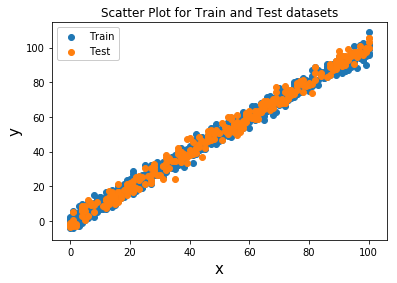

In [11]:
plt.scatter((dt1b['x']),dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

We retrieve the independent(x) and dependent(y) variables and since we have only one feature(x) 
we reshape them so that we could feed them into our linear regression model.

In [24]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

Fit model and get the intercept and coefficent

In [13]:
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9888014444327563
9.43292219203931


In [14]:
print("intercept: {}".format(reg.intercept_))

intercept: -0.10726546430095851


In [15]:
print("coeffcient: {}".format(reg.coef_))

coeffcient: [1.00065638]


Therefore the fitted line : y = -0.10726546430095851 + 1.00065638*x

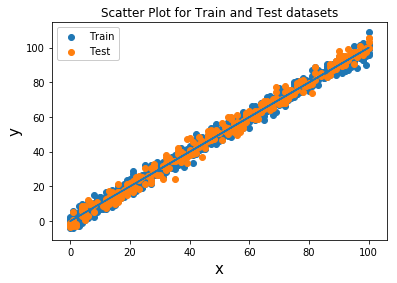

In [16]:
plt.scatter(dt1b['x'],dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt1b['x'], (-0.10726546430095851 + 1.00065638*dt1b['x']))

How about build sample residual?

In [17]:
y_pred_b = reg.predict(x_train)
residuale = y_train - y_pred_b

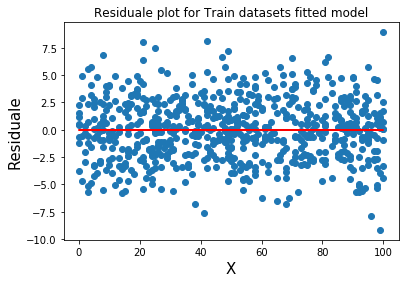

In [18]:
plt.scatter((dt1b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt1b['x'], 0*dt1b['x'], color="r")

Residule distributed around zero randomly, the model fit is adequate 

# Practice 2 - Use "train2.csv" and "test2.csv" build simple linear model, did you observe any special trends? How to improve the model fit

Below code give a initial scripts to look into data, 
please take sometime following majority steps of practice 1 to tackle this problem 

In [19]:
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [54]:
dt2b.head()

,x,y
0,576.0,21.549452
1,2500.0,47.464463
2,225.0,17.218656
3,1444.0,36.586398
4,7569.0,87.288984


In [55]:
dt2t.head()

,x,y
0,5929,79.775152
1,441,23.177279
2,484,25.609262
3,400,17.857388
4,1296,41.849864


In [56]:
dt2b.describe()

,x,y
count,7.000000e+02,699.000000
mean,2.113670e+04,49.939869
std,4.709034e+05,29.109217
min,0.000000e+00,-3.839981
25%,6.250000e+02,24.929968
50%,2.401000e+03,48.973020
75%,5.625000e+03,74.929911
max,1.246201e+07,108.871618


In [57]:
dt2t.describe()

,x,y
count,300.000000,300.000000
mean,3404.330000,51.205051
std,2996.644856,29.071481
min,0.000000,-3.467884
25%,729.000000,25.676502
50%,2809.000000,52.170557
75%,5329.000000,74.303007
max,10000.000000,105.591837


In [20]:
print("Train data misscnt: {}".format(dt2b.isnull().sum()))
print("Test data misscnt: {}".format(dt2t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


In [63]:
dt2b = dt2b.dropna()
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))
print("Train data misscnt: {}".format(dt2b.isnull().sum()))
print("Test data misscnt: {}".format(dt2t.isnull().sum()))
print(np.any(np.isnan(dt2b)))
print(np.any(np.isnan(dt2t)))
print(np.all(np.isfinite(dt2b)))
print(np.all(np.isfinite(dt2t)))


dt2b=dt2b[~dt2b.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
dt2t=dt2t[~dt2t.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))
#print(np.all(np.isfinite(dt2b)))
#print(np.all(np.isfinite(dt2t)))


Train data size: (699, 2)
Test data size: (300, 2)
Train data misscnt: x    0
y    0
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64
x    False
y    False
dtype: bool
x    False
y    False
dtype: bool
x    True
y    True
dtype: bool
x    True
y    True
dtype: bool
Train data size: (699, 2)
Test data size: (300, 2)


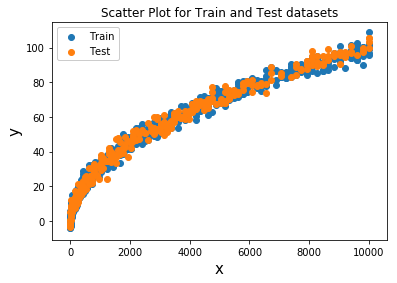

In [23]:
plt.scatter((dt2b['x']),dt2b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt2t['x']),dt2t['y'], label="Test")

plt.legend(framealpha=1, frameon=True) # Look like a parabola

In [25]:
x_train = dt2b['x']
y_train = dt2b['y']
x_test = dt2t['x']
y_test = dt2t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [27]:
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9255137107058171
62.74232128123423


In [28]:
print("intercept: {}".format(reg.intercept_))
print("coeffcient: {}".format(reg.coef_))

intercept: 19.293935641609785
coeffcient: [0.00917928]


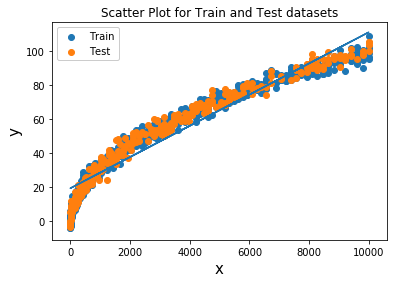

In [30]:
plt.scatter(dt2b['x'],dt2b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt2t['x']),dt2t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt2b['x'], (19.293935641609785 + 0.00917928*dt2b['x']))

RMSE for Linear Regression:  7.941108295815582


(699, 3)

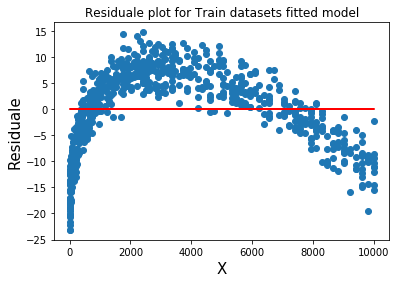

In [71]:
y_pred_b = reg.predict(x_train)
residuale = y_train - y_pred_b
plt.scatter((dt2b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt2b['x'], 0*dt2b['x'], color="r") #informative residual
print('RMSE for Linear Regression: ',np.sqrt(mean_squared_error(y_train,y_pred_b)))

To impove the goodness of fit, we need to use cubic term.

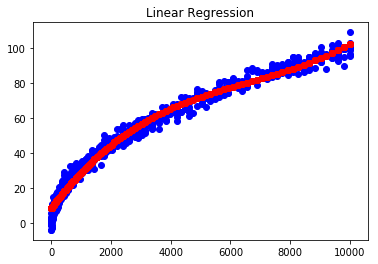

In [89]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
x_train = dt2b['x']
y_train = dt2b['y']
x_test = dt2t['x']
y_test = dt2t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

poly = PolynomialFeatures(degree =3) 
X_poly = poly.fit_transform(x_train) 
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
# Visualising the Linear Regression results 
plt.scatter(x_train, y_train, color = 'blue') 
plt.scatter(x_train,lin2.predict(poly.fit_transform(x_train)), color = 'red') 
plt.title('Linear Regression') 
plt.show() 

RMSE for Linear Regression:  3.6254629248607


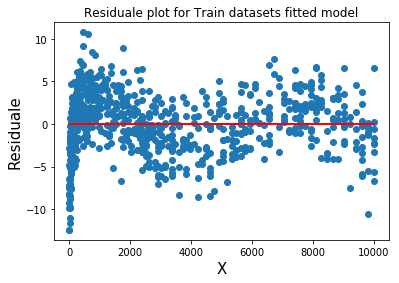

In [90]:
y_pred_b = lin2.predict(poly.fit_transform(x_train))
residuale = y_train - y_pred_b
plt.scatter((dt2b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt2b['x'], 0*dt2b['x'], color="r") #informative residual
print('RMSE for Linear Regression: ',np.sqrt(mean_squared_error(y_train,y_pred_b)))

# Ok. There're still informative residual. Actually, the paralora looks more like log curve but I failed fitting one. 

# Practice 3 - Use "train3.csv" and "test3.csv" build simple linear model, did you observe any special trends? How to improve the model fit

In [91]:
print("Train data size: {}".format(dt3b.shape))
print("Test data size: {}".format(dt3t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [83]:
dt3b.head()

,x,y
0,24.0,464.378880
1,50.0,2252.875253
2,15.0,296.482126
3,38.0,1338.564521
4,87.0,7619.366709


In [84]:
dt3t.head()

,x,y
0,77,6364.074878
1,21,537.186256
2,22,655.834278
3,20,318.886311
4,36,1751.411149


In [85]:
dt3b.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,3340.124826
std,134.681703,3055.712556
min,0.000000,0.014850
25%,25.000000,621.515765
50%,49.000000,2398.356724
75%,75.000000,5614.501316
max,3530.157369,11853.029271


In [86]:
dt3t.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,3464.291087
std,28.504286,3082.356336
min,0.000000,0.075794
25%,27.000000,659.283348
50%,53.000000,2721.780348
75%,73.000000,5520.944197
max,100.000000,11149.636147


In [94]:
dt3b = dt3b.dropna()
print("Train data size: {}".format(dt3b.shape))
print("Test data size: {}".format(dt3t.shape))
print("Train data misscnt: {}".format(dt3b.isnull().sum()))
print("Test data misscnt: {}".format(dt3t.isnull().sum()))
print(np.any(np.isnan(dt3b)))
print(np.any(np.isnan(dt3t)))
print(np.all(np.isfinite(dt3b)))
print(np.all(np.isfinite(dt3t)))


dt2b=dt2b[~dt2b.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
dt2t=dt2t[~dt2t.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
#print("Train data size: {}".format(dt2b.shape))
#print("Test data size: {}".format(dt2t.shape))
#print(np.all(np.isfinite(dt2b)))
#print(np.all(np.isfinite(dt2t)))

Train data size: (699, 2)
Test data size: (300, 2)
Train data misscnt: x    0
y    0
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64
x    False
y    False
dtype: bool
x    False
y    False
dtype: bool
x    True
y    True
dtype: bool
x    True
y    True
dtype: bool


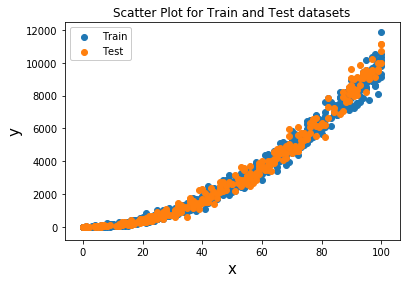

In [95]:
plt.scatter((dt3b['x']),dt3b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt3t['x']),dt3t['y'], label="Test")

plt.legend(framealpha=1, frameon=True) # Look like a parabola

In [96]:
x_train = dt3b['x']
y_train = dt3b['y']
x_test = dt3t['x']
y_test = dt3t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print("intercept: {}".format(reg.intercept_))
print("coeffcient: {}".format(reg.coef_))

0.9204524642903842
753255.5700480758
intercept: -1743.2412867403104
coeffcient: [101.63824122]


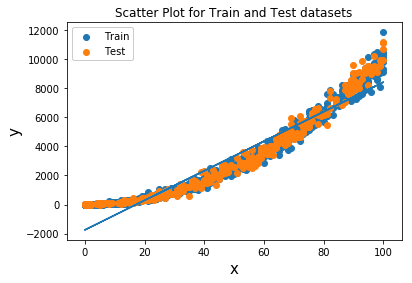

In [97]:
plt.scatter(dt3b['x'],dt3b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt3t['x']),dt3t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt3b['x'], (-1743.2412867403104 + 101.63824122*dt3b['x']))

RMSE for Linear Regression:  822.0742550604205


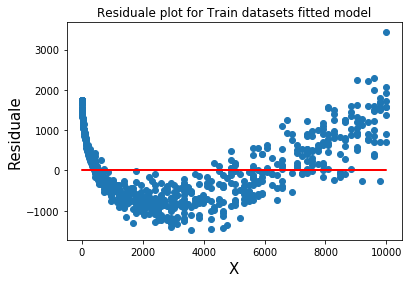

In [98]:
y_pred_b = reg.predict(x_train)
residuale = y_train - y_pred_b
plt.scatter((dt2b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt2b['x'], 0*dt2b['x'], color="r") 
print('RMSE for Linear Regression: ',np.sqrt(mean_squared_error(y_train,y_pred_b)))

To impove the goodness of fit, we need to use quadratic term.

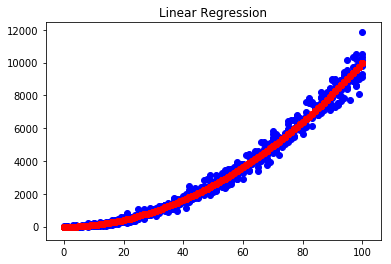

In [99]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
x_train = dt3b['x']
y_train = dt3b['y']
x_test = dt3t['x']
y_test = dt3t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

poly = PolynomialFeatures(degree =2) 
X_poly = poly.fit_transform(x_train) 
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
# Visualising the Linear Regression results 
plt.scatter(x_train, y_train, color = 'blue') 
plt.scatter(x_train,lin2.predict(poly.fit_transform(x_train)), color = 'red') 
plt.title('Linear Regression') 
plt.show() 

RMSE for Linear Regression:  329.7165035336704


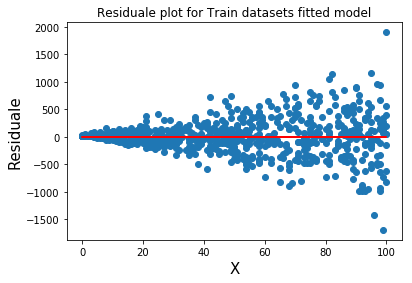

In [100]:
y_pred_b = lin2.predict(poly.fit_transform(x_train))
residuale = y_train - y_pred_b
plt.scatter((dt3b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt3b['x'], 0*dt3b['x'], color="r")
print('RMSE for Linear Regression: ',np.sqrt(mean_squared_error(y_train,y_pred_b)))

# Practice 4 - Can you implement simple linear regression model in practice1 from scratch using gradient descent?
# This is your homework

In [4]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [4]:
dt1b=dt1b.dropna()
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train).reshape(699,1)
y_train = np.array(y_train).reshape(699,1)
x_test = np.array(x_test).reshape(300,1)
y_test = np.array(y_test).reshape(300,1)

### Train steps:
#### 0 - Initiate parameters
#### 1 - Calculate prediction based on temp parameters and equation 
#### 2 - Calc. cost
#### 3 - Calc. Gradient
#### 4 - Update Parameter
#### 5 - loop 1-4 to reach min cost
#### 6 - earlier stop to end loop if minimal alrrady reached

### Building block functions (Only put two you need to finish the rest)

In [22]:
def get_pred(x_train, parameters):
    b1 = parameters['b1']
    b0 = parameters['b0']
    predictions = np.multiply(b1, x_train) + b0
    return predictions

def cost_function(predictions, y_train):
    cost = np.mean((y_train - predictions) ** 2) * 0.5
    return cost

def deriv(x_train, y_train, predictions):
    derivatives=[x_train.T.dot(predictions-y_train)/x_train.shape[0],np.mean((predictions-y_train))]
    return derivatives

def update_parameters(parameters, derivatives, learning_rate):
    parameters['b1']=parameters['b1']-learning_rate*derivatives[0]
    parameters['b0']=parameters['b0']-learning_rate*derivatives[1]
    return parameters

### Build training function

In [23]:
def train(x_train, y_train, learning_rate, iters = 5):
    #random parameters
    parameters = dict()
    parameters["b1"] = np.random.uniform(0,1) * -1
    parameters["b0"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        predictions=get_pred(x_train,parameters)
        cost=cost_function(predictions, y_train)

        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        plt.plot(x_train, y_train, 'x')
        plt.plot(x_train, predictions, 'o')
        plt.show()
        
        derivatives=deriv(x_train, y_train, predictions)
        parameters=update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

### Traing model with your function by gradient descent algrithm

Iteration = 1, Loss = 6549.903241401168


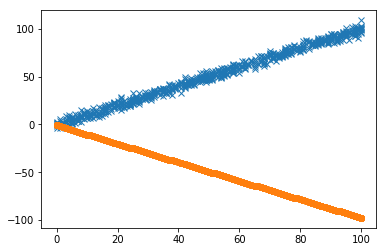

Iteration = 2, Loss = 6868855.680833617


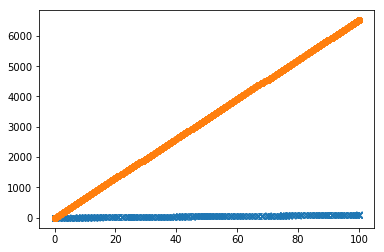

Iteration = 3, Loss = 7207740848.865213


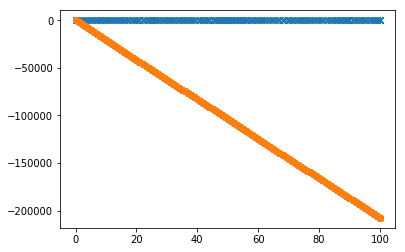

Iteration = 4, Loss = 7563349821952.271


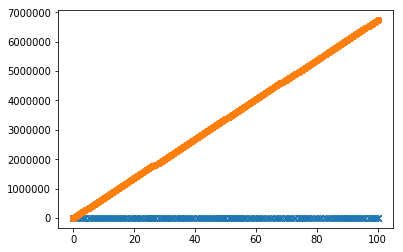

Iteration = 5, Loss = 7936503512049447.0


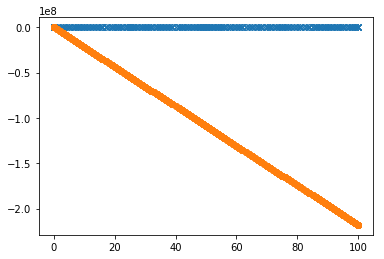

({'b0': 1057961.7515665477, 'b1': array([[70616728.59536149]])},
 [6549.903241401168,
  6868855.680833617,
  7207740848.865213,
  7563349821952.271,
  7936503512049447.0])

In [21]:
train(x_train, y_train, 0.01, iters = 5)

### Print your final fitted model/ validate model on test data set

Y=1057961.7515665477+70616728.59536149*X

Iteration = 1, Loss = 3425.001334932658


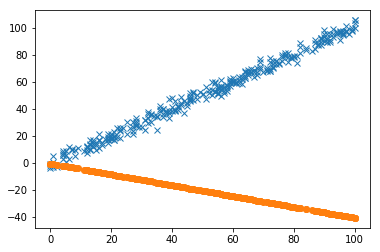

Iteration = 2, Loss = 3736345.318090744


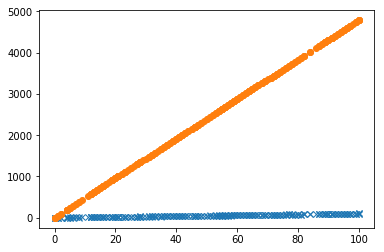

Iteration = 3, Loss = 4081442002.7222967


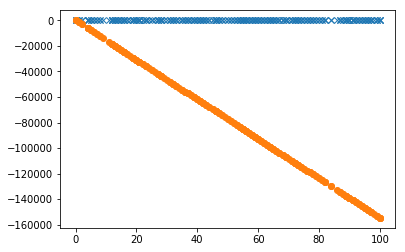

Iteration = 4, Loss = 4458417998234.03


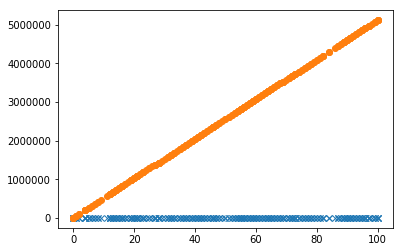

Iteration = 5, Loss = 4870212796358410.0


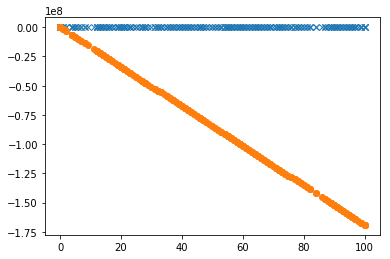

({'b0': 836350.740481308, 'b1': array([[55893267.66530406]])},
 [3425.001334932658,
  3736345.318090744,
  4081442002.7222967,
  4458417998234.03,
  4870212796358410.0])

In [24]:
train(x_test, y_test, 0.01, iters = 5)

In [26]:
y_pred_t=get_pred(x_test, {'b1':836350.740481308,'b0':55893267.66530406})
print('RMSE for Linear Regression: ',np.sqrt(mean_squared_error(y_test,y_pred_t)))

RMSE for Linear Regression:  101328794.03595552
